['iSWAP_q3_xy_q3_z_q8_z_-0.01_20240502_1722.nc', 'iSWAP_q3_xy_q3_z_q8_z_-0.02_20240502_1713.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.01_20240502_1734.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.02_20240502_1743.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.035_20240502_2003.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.03_20240502_1753.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.045_20240502_1932.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.047_20240502_1954.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.048_20240502_2135.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.04_20240502_1802.nc', 'iSWAP_q3_xy_q3_z_q8_z_0.0_20240502_2100.nc']
(50, 496)
(50, 496)
(50, 496)
(50, 496)
(50, 496)
(50, 496)
(50, 496)
(50, 496)
(50, 496)
(50, 496)
(50, 496)


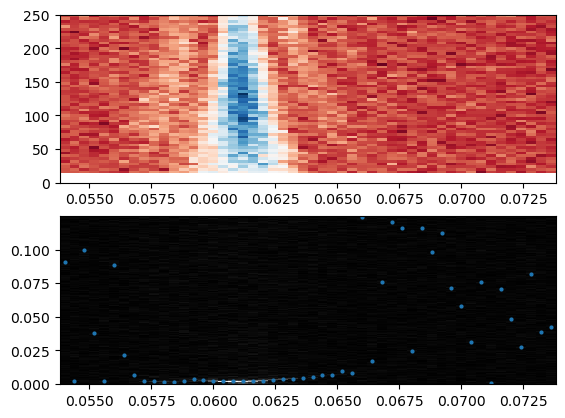

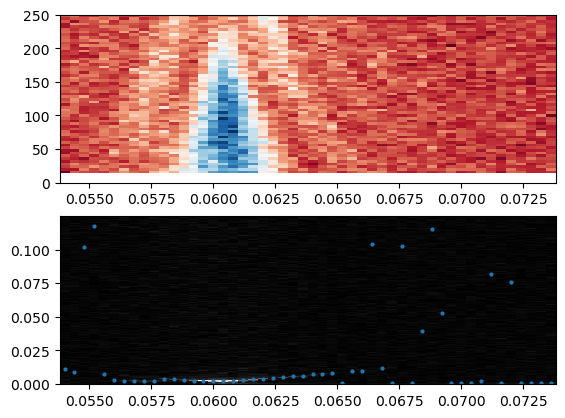

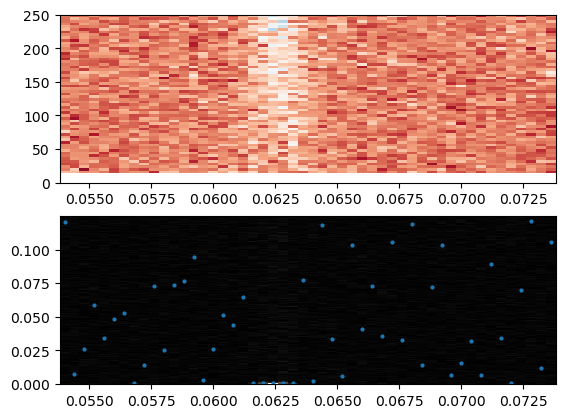

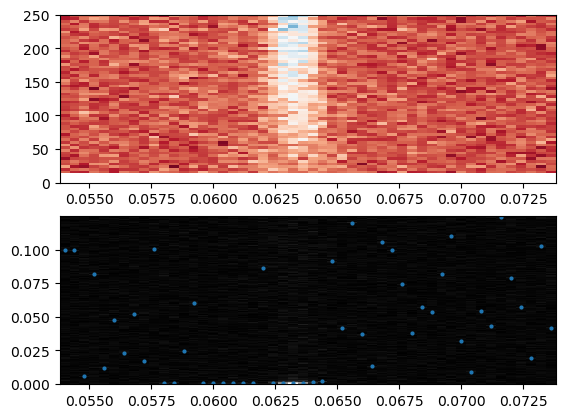

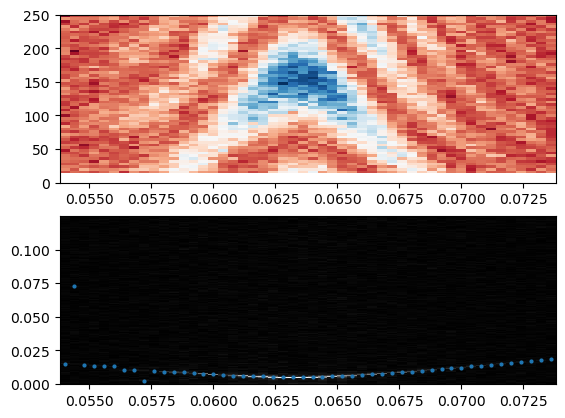

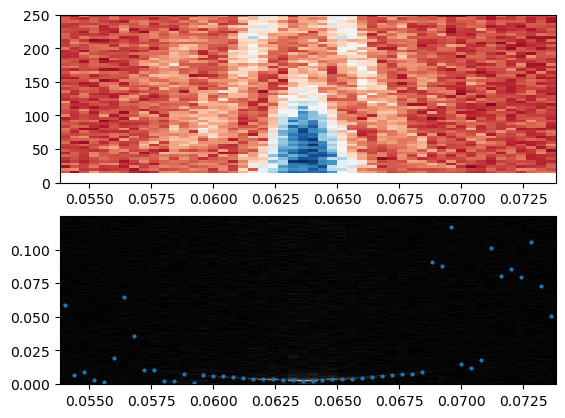

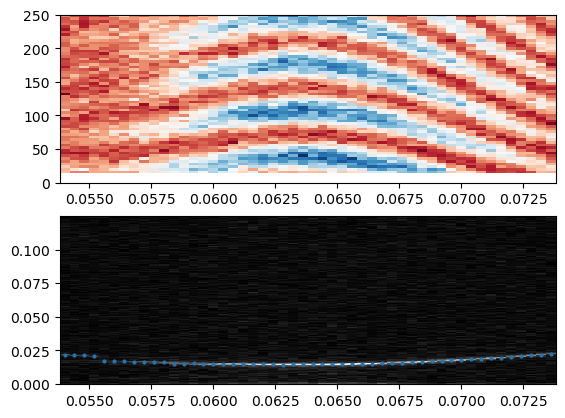

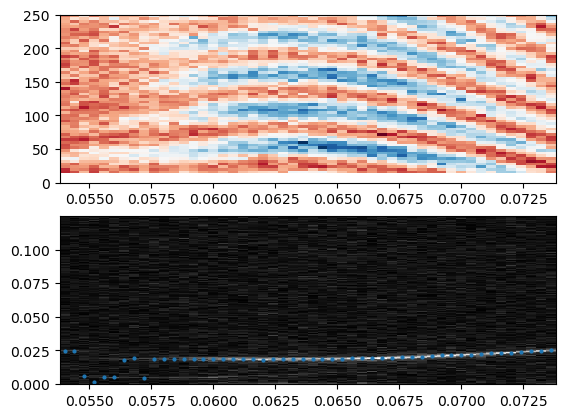

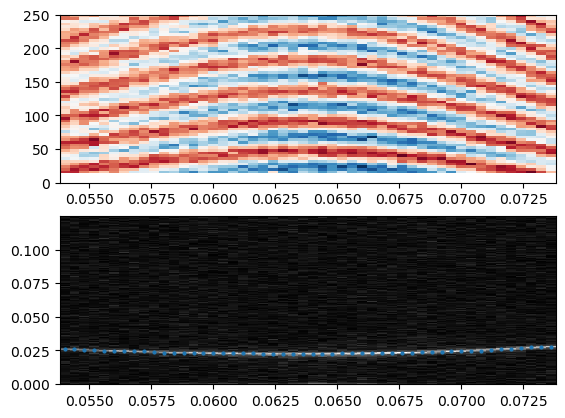

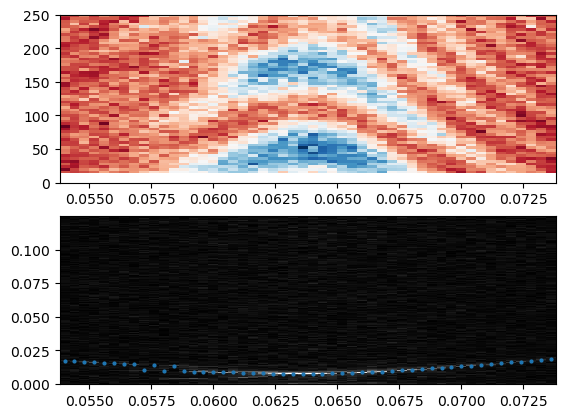

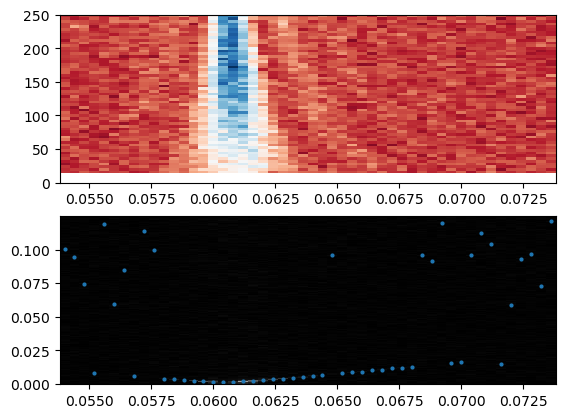

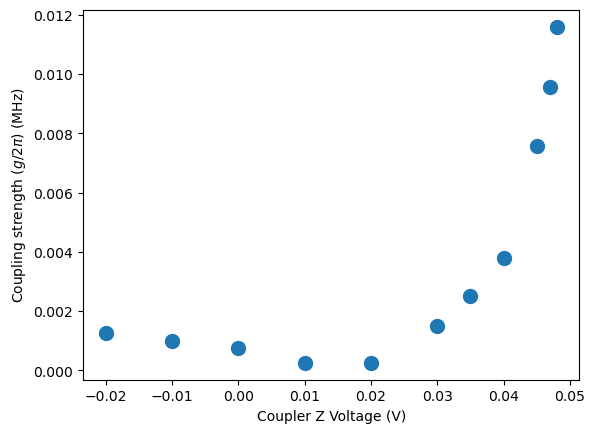

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os



# Specify the directory path
folder_path = r'D:\Data\5Q4C_0411_3_DR4\iSWAP_34'

# Get a list of files in the specified directory
file_names = os.listdir(folder_path)

# Print the list of files
print(file_names)

from qcat.visualization.iSWAP_chavron import plot_iSWAP_analysis_result
file_lst = os.listdir(folder_path)
iSWAP_freq = []
zc_amps = []
for f in file_lst:

    dataset = xr.open_dataset(f'{folder_path}\{f}')
    dataset = dataset.transpose("mixer", "amplitude", "time")
    zc_amp = float(f.split("_")[7])
    zc_amps.append(zc_amp)

    time = dataset.coords["time"].values*4
    amps = dataset.coords["amplitude"].values


    # for ro_name, data in dataset.data_vars.items():
    data = dataset.data_vars["q4_ro"]
    print( data.values[1].shape )
    iSWAP_freq.append( plot_iSWAP_analysis_result( data.values[1], amps, time ) )

fig, ax = plt.subplots()
ax.plot(np.array(zc_amps), np.array(iSWAP_freq)/2,'o', ms=10)
ax.set_xlabel("Coupler Z Voltage (V)")
ax.set_ylabel(r"Coupling strength ($g/2\pi$) (MHz)")

plt.show()

import pandas as pd
# Step 3: Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame( { "z":np.array(zc_amps),"coupling strength":np.array(iSWAP_freq)/2})

# Step 4: Export the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

In [ ]:

# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
from qcat.visualization.iSWAP_chavron import plot_iSWAP_analysis_result

dataset = xr.open_dataset(r'd:\Data\5Qv4_0822_8_ITRIMixer\iSWAP_q1_xy_q1_z_q2_z_0_20240605_1748.nc')
dataset = dataset.transpose("mixer", "amplitude", "time")


time = dataset.coords["time"].values*4
amps = dataset.coords["amplitude"].values


# for ro_name, data in dataset.data_vars.items():
data = dataset.data_vars["q1_ro"]
print( data.values[0].shape )
iSWAP_freq =  plot_iSWAP_analysis_result( data.values[0], amps, time ) 

plt.show()